# Banque du Canada

## Imports

In [1]:
import pandas as pd
import requests
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [2]:
save_to = "data/Banque du Canada/"

## Get series list

In [3]:
serie_list = pd.read_csv("https://www.bankofcanada.ca/valet/lists/series/csv", skiprows=4)

### columns name list

In [4]:
serie_list.columns.to_list()

['name', 'label', 'description', 'link']

### Series name liste

In [5]:
serie_list['description'].to_list()

['U.S. dollar (close)',
 'U.S. dollar (high)',
 'U.S. dollar (low)',
 'U.S. dollar closing,90-day',
 'European Euro (close)',
 'Danish krone (close)',
 'Japanese yen (close)',
 'Norwegian krone (close)',
 'Swiss franc (close)',
 'U.K. pound sterling (close)',
 'Hong Kong dollar (close)',
 'Australian dollar (close)',
 'New Zealand dollar (close)',
 'Mexican peso (close)',
 'Swedish krona (close)',
 'U.S. dollar (noon)',
 'Argentine peso',
 'Australian dollar',
 'Bahamian dollar',
 'Brazilian real',
 'CFA franc',
 'CFP franc',
 'Chilean peso',
 'Chinese renminbi',
 'Colombian peso',
 'Croatian kuna',
 'Czech Republic koruna',
 'Danish krone',
 'East Caribbean dollar',
 'European Euro',
 'Fiji dollar',
 'Ghanaian cedi',
 'Guatemalan quetzal',
 'Honduran lempira',
 'Hong Kong dollar',
 'Hungarian forint',
 'Icelandic krona',
 'Indian rupee',
 'Indonesian rupiah',
 'Israeli new shekel',
 'Jamaican dollar',
 'Japanese yen',
 'Malaysian ringgit',
 'Mexican peso',
 'Moroccan dirham',
 'Myanma

#### CPI

In [7]:
desc = 'Inflation Expectations - Over the next two years, what do you expect the annual rate of inflation to be, based on the consumer price index?'
inflation = serie_list[serie_list["description"] == desc]

for k,v in inflation.iterrows():
    p = serie_list.iloc[k]["link"]
    print(p)

https://www.bankofcanada.ca/valet/series/BELOW1
https://www.bankofcanada.ca/valet/series/ONETWO
https://www.bankofcanada.ca/valet/series/TWOTHREE
https://www.bankofcanada.ca/valet/series/ABOVE3
https://www.bankofcanada.ca/valet/series/INFLNA


### Real return series name

In [6]:
l = ['Yield spread between convent. and Real Return bonds', 'Real Return Bonds',
     'Expectations implicit in real/nominal bond spread',
'Real Return Bonds - Ref CPI', 
'Real Return Bonds - Index ratio 2021', 
'Real Return Bonds - Index ratio 2026', 
'Real Return Bonds - Index ratio 2031', 
'Real Return Bonds - Index ratio 2036', 
'Real Return Bonds - Index ratio 2041', 
'Real Return Bonds - Index ratio 2044', 
'Real Return Bonds - Index ratio 2047',]

#### Select the time serie by lable

In [8]:
serie_list[serie_list["label"]==l[0]]

,name,label,description,link
297,STATIC_ATABLE_V122544_V122553,Yield spread between convent. and Real Return ...,Yield spread between convent. and Real Return ...,https://www.bankofcanada.ca/valet/series/STATI...


In [9]:
serie_list.iloc[297]["link"]

'https://www.bankofcanada.ca/valet/series/STATIC_ATABLE_V122544_V122553'

### Get ther data

In [10]:

real_rate = pd.read_csv(serie_list.iloc[971]["link"], on_bad_lines='warn')

Skipping line 4: expected 1 fields, saw 2
Skipping line 6: expected 1 fields, saw 2
Skipping line 7: expected 1 fields, saw 2



In [55]:
real_rate

,{
0,"""terms"": {"
1,"""url"": ""https://www.bankofcanada.ca/te..."
2,"""seriesDetails"": {"
3,"""description"": ""Government of Canada b..."
4,}
5,}


In [11]:
k = "https://www.bankofcanada.ca/valet/observations/IEXE6401/csv?start_date=2023-01-23&end_date=2023-07-19&order_dir=asc"

s = pd.read_csv(k, on_bad_lines='warn')
s

Skipping line 5: expected 1 fields, saw 3
Skipping line 6: expected 1 fields, saw 3



,TERMS AND CONDITIONS
0,https://www.bankofcanada.ca/terms/
1,SERIES


## Interest rates Term structure

### series Name

In [12]:

serie_name_dict = {"Prime rate1": "V80691311", 
                   "Conventional mortgage 1-year": "V80691333", 
                   "Conventional mortgage 3-year": "V80691334", 
                   "Conventional mortgage 5-year": "V80691335", 
                   "Guaranteed investment certificates 1-year": "V80691339"	, 
                   "Guaranteed investment certificates 3-year": "V80691340"	, 
                   "Guaranteed investment certificates 5-year": "V80691341"	
} 




In [13]:
bank_rate_dict = requests.get("https://www.banqueducanada.ca/valet/observations/group/chartered_bank_interest/json").json()


# t = json.load("https://www.banqueducanada.ca/valet/observations/group/chartered_bank_interest/json")

In [14]:
def bank_of_canada_to_df(bank_dict):
    pass

data_dict = {}
label_dict = {}
for k, v in bank_rate_dict['seriesDetail'].items():
    data_dict[k]=[]
    label_dict[k]=v['label']
    

date_index = []

for row in bank_rate_dict['observations']:
    date_index.append(datetime.strptime(row['d'], "%Y-%m-%d"))
    for k in bank_rate_dict['seriesDetail']:
        if k in row:
            data_dict[k].append(float(row[k]['v']) / 100)
        else:
            data_dict[k].append(None)
            
df = pd.DataFrame(data_dict, index=date_index)
df.rename(columns=label_dict)
# print(len(df.columns.to_list()), len(label_dict))

,Taux préférentiel,1 an,3 ans,5 ans,1 an,3 ans,5 ans,Dépôts à 5 ans des particuliers,Comptes d’épargne à intérêt quotidien (soldes supérieurs à 100 000 $),Dépôts d’épargne non transférables par chèque
1967-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0450
1967-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0450
1967-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0450
1967-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0450
1967-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0450
...,...,...,...,...,...,...,...,...,...,...
2024-03-20,0.072,0.0784,0.0699,0.0684,0.046,0.0392,0.0395,0.0345,0.0001,0.0001
2024-03-27,0.072,0.0784,0.0699,0.0684,0.046,0.0392,0.0395,0.0345,0.0001,0.0001
2024-04-03,0.072,0.0784,0.0699,0.0684,0.046,0.0392,0.0395,0.0345,0.0001,0.0001
2024-04-10,0.072,0.0784,0.0699,0.0684,0.046,0.0392,0.0395,0.0345,0.0001,0.0001


In [15]:
df.index

DatetimeIndex(['1967-04-05', '1967-04-12', '1967-04-19', '1967-04-26',
               '1967-05-03', '1967-05-10', '1967-05-17', '1967-05-24',
               '1967-05-31', '1967-06-07',
               ...
               '2024-02-14', '2024-02-21', '2024-02-28', '2024-03-06',
               '2024-03-13', '2024-03-20', '2024-03-27', '2024-04-03',
               '2024-04-10', '2024-04-17'],
              dtype='datetime64[ns]', length=2977, freq=None)

<AxesSubplot: >

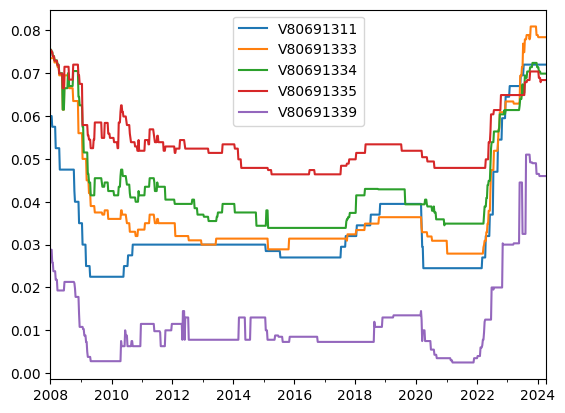

In [16]:
df[["V80691311","V80691333","V80691334","V80691335","V80691339"]]["2008-01-01":].plot()

In [22]:
for d in df.index:
    if d.year == 2023:
        # if d.month == 11:
        print(d)

2023-01-04 00:00:00
2023-01-11 00:00:00
2023-01-18 00:00:00
2023-01-25 00:00:00
2023-02-01 00:00:00
2023-02-08 00:00:00
2023-02-15 00:00:00
2023-02-22 00:00:00
2023-03-01 00:00:00
2023-03-08 00:00:00
2023-03-15 00:00:00
2023-03-22 00:00:00
2023-03-29 00:00:00
2023-04-05 00:00:00
2023-04-12 00:00:00
2023-04-19 00:00:00
2023-04-26 00:00:00
2023-05-03 00:00:00
2023-05-10 00:00:00
2023-05-17 00:00:00
2023-05-24 00:00:00
2023-05-31 00:00:00
2023-06-07 00:00:00
2023-06-14 00:00:00
2023-06-21 00:00:00
2023-06-28 00:00:00
2023-07-05 00:00:00
2023-07-12 00:00:00
2023-07-19 00:00:00
2023-07-26 00:00:00
2023-08-02 00:00:00
2023-08-09 00:00:00
2023-08-16 00:00:00
2023-08-23 00:00:00
2023-08-30 00:00:00
2023-09-06 00:00:00
2023-09-13 00:00:00
2023-09-20 00:00:00
2023-09-27 00:00:00
2023-10-04 00:00:00
2023-10-11 00:00:00
2023-10-18 00:00:00
2023-10-25 00:00:00
2023-11-01 00:00:00
2023-11-08 00:00:00
2023-11-15 00:00:00
2023-11-22 00:00:00
2023-11-29 00:00:00
2023-12-06 00:00:00
2023-12-13 00:00:00


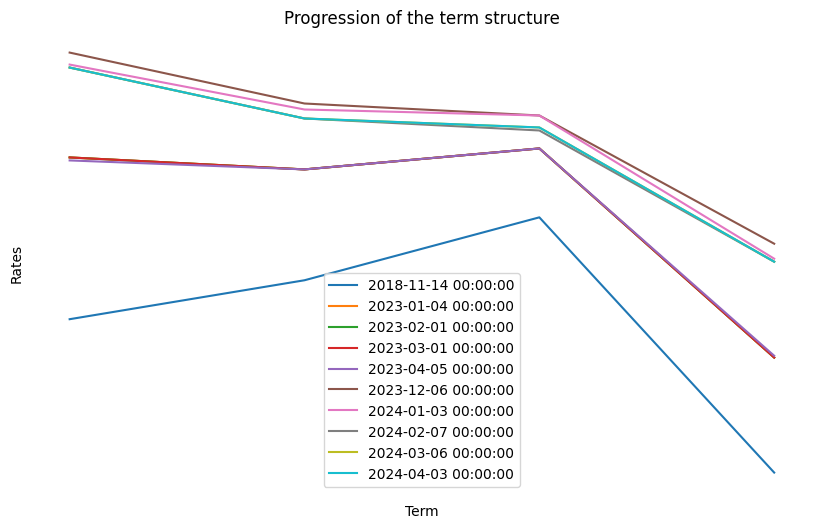

In [24]:
rate_comparison_df = df[["V80691333","V80691334","V80691335","V80691339"]].loc[["2018-11-14",
                                                                                "2023-05-10", 
                                                                                "2023-06-14", 
                                                                                "2023-07-19", 
                                                                                "2023-08-16",
                                                                                "2023-09-13",
                                                                                "2023-10-11",
                                                                                "2023-11-01",
                                                                                "2023-11-08",
                                                                                "2024-01-03",
                                                                                "2024-02-07",
                                                                                "2024-03-06",
                                                                                "2024-04-03",]]
rate_comparison_df = df[["V80691333","V80691334","V80691335","V80691339"]].loc[["2018-11-14",
                                                                                "2023-01-04", 
                                                                                "2023-02-01", 
                                                                                "2023-03-01", 
                                                                                "2023-04-05",
                                                                                "2023-12-06",
                                                                                "2024-01-03",
                                                                                "2024-02-07",
                                                                                "2024-03-06",
                                                                                "2024-04-03",]]
rate_comparison_df = rate_comparison_df.transpose()

fig, ax = plt.subplots(figsize=(10, 6))

    
rate_comparison_df.plot(kind='line', ax=ax)
plt.title('Comparison of Rates')
plt.xlabel('Rate Types')
plt.ylabel('Rates')

ax.set_title('Progression of the term structure')
ax.set_xlabel('Term')
ax.set_ylabel('Rates')
ax.legend(loc='best')

# Remove the axes and related elements
ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
plt.show()
# df[["V80691333","V80691334","V80691335","V80691339"]].index

In [25]:
rate_comparison_df

,2018-11-14,2023-01-04,2023-02-01,2023-03-01,2023-04-05,2023-12-06,2024-01-03,2024-02-07,2024-03-06,2024-04-03
V80691333,0.0364,0.0634,0.0634,0.0634,0.0629,0.0809,0.0789,0.0784,0.0784,0.0784
V80691334,0.0429,0.0614,0.0614,0.0614,0.0614,0.0724,0.0714,0.0699,0.0699,0.0699
V80691335,0.0534,0.0649,0.0649,0.0649,0.0649,0.0704,0.0704,0.0679,0.0684,0.0684
V80691339,0.0108,0.0300,0.0300,0.0300,0.0303,0.0490,0.0465,0.0460,0.0460,0.0460


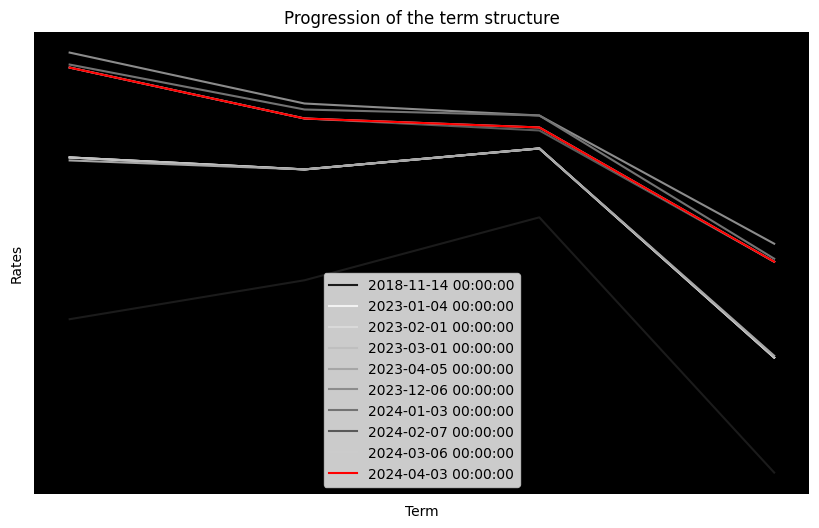

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of colors in a gradient from light to dark gray
num_lines = len(rate_comparison_df.columns)
colors = [plt.cm.Greys(i / num_lines) for i in range(num_lines)]

# Set the color for the last trace to red
colors[-1] = 'red'
# Create a custom color gradient from darker gray to lighter gray
# Starting from a slightly darker gray (e.g., '0.1')
colors = [f'0.{i}'+'5' for i in reversed(range(1, 1 + num_lines))]
colors[-2] = '0.8'
# Set the last trace (line) to red
colors[-1] = 'red'

# Create a custom colormap with the specified colors
cmap = plt.cm.colors.ListedColormap(colors)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data with the specified colors
for i, (label, column) in enumerate(rate_comparison_df.items()):
    ax.plot(rate_comparison_df.index, column, label=label, color=colors[i])

plt.title('Comparison of Rates')
plt.xlabel('Rate Types')
plt.ylabel('Rates')

ax.set_title('Progression of the term structure')
ax.set_xlabel('Term')
ax.set_ylabel('Rates')
ax.legend(loc='best')

# Set the background to black
ax.set_facecolor('black')

# Remove the axes and related elements
ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()


# Terme structure of interest rate


In the context of financial applications, understanding the yield curve for zero-coupon bonds is crucial. The yield curve represents the relationship between the interest rates (or yields) and the time to maturity for a set of similar bonds. For zero-coupon bonds, which don't pay periodic interest but are instead issued at a discount and redeemed at face value, the yield curve can provide valuable insights.

Here are key interpretations of the yield curve for zero-coupon bonds:

1. **Normal Yield Curve:**
   - **Upward Sloping:** In a normal yield curve, longer-term zero-coupon bonds typically have higher yields than shorter-term ones. This reflects the compensation investors require for tying up their money for an extended period.

2. **Inverted Yield Curve:**
   - **Downward Sloping:** An inverted yield curve occurs when short-term zero-coupon bonds have higher yields than long-term ones. This inversion is often interpreted as a signal of potential economic downturn or recession.

3. **Flat Yield Curve:**
   - **Constant Yields:** A flat yield curve suggests that yields for zero-coupon bonds are relatively consistent across different maturities. This might indicate uncertainty about future economic conditions.

4. **Steep Yield Curve:**
   - **Sharp Increase:** A steep yield curve implies a significant difference between short-term and long-term yields. This can happen when there is optimism about economic growth, and investors demand higher compensation for the risk of inflation.

5. **Shape Changes Over Time:**
   - **Dynamic Indicator:** The yield curve is not static and can change over time based on economic conditions, monetary policy, and market sentiment. Monitoring these changes can provide insights into market expectations and potential shifts in economic health.

6. **Risk and Return Considerations:**
   - **Risk Assessment:** Investors often use the yield curve to assess the level of risk in the market. Higher yields on long-term zero-coupon bonds may indicate perceived risks or uncertainties in the distant future.

7. **Benchmark for Pricing:**
   - **Valuation Reference:** The yield curve serves as a benchmark for pricing various financial instruments. Understanding the yield curve is essential for pricing bonds, derivatives, and other fixed-income securities.

In your work developing financial applications, you might utilize these interpretations to build models, analyze market trends, or assist users in making informed investment decisions based on the shape and movement of the yield curve. Additionally, you can use Python, Django, JavaScript, and JupyterLab to implement visualizations and interactive tools for better understanding and analysis of yield curve data.

In [27]:
action="https://www.bankofcanada.ca/stats/results/csv"



In [29]:
html_for<form action="https://www.bankofcanada.ca/stats/results/csv" method="get" id="lookupForm" target="_blank" onsubmit="window.focus(); return checkValidArray();">
    <fieldset>
        <legend>Yield Curve Data</legend>
        <input type="hidden" name="lookupPage" value="lookup_yield_curve.php">
        <input type="hidden" name="startRange" value="1986-01-01">
        <div class=" col-sm-12">
            <div class="radio">
                <label>
                    <input type="radio" id="lastchange" name="searchRange" value="all" checked="checked">
                    <label for="lastchange">Retrieve all data </label>
                </label>
                <p class="help">ZIP file, approx 8 MB</p>
            </div>

            <div class="radio">
                <label>
                    <input type="radio" id="datesrange" name="searchRange" value="">
                    <label for="datesrange">Retrieve data for the following period, from </label>
                </label>
                <div class="form-inline">
    <div class="form-group">
        <label class="control-label">Start (or single date) </label>
        <div class="input-group inline">
            <div class="bocss-input__group" data-field-name="dFrom">
    
    <input type="text" name="dFrom" id="dFrom" class="bocss-input__text bocss-input__date" autocomplete="on" placeholder="yyyy-mm-dd" value="2013-11-13" max="2023-10-25" min="1986-01-01" aria-label="Start (or single date) ">
    
</div>        </div>
        <label class="control-label">to</label>
        <div class="input-group inline">
            <div class="bocss-input__group" data-field-name="dTo">
    
    <input type="text" name="dTo" id="dTo" class="bocss-input__text bocss-input__date" autocomplete="on" placeholder="yyyy-mm-dd" value="2023-10-25" max="2023-10-25" min="1986-01-01" aria-label="End date ">
    
</div>        </div>
    </div>
</div>
<style>
    .inline .bocss-input__group{
      margin-top:0;
    }
</style>
<script>
    jQuery(function () {
        let $dTo = jQuery('#dTo');
        let $dFrom = jQuery('#dFrom');
        $dTo.on('change', change);
        $dTo.on('click', change);
        $dFrom.on('change', change);
        $dFrom.on('click', change);

        //Force auto-complete on to make sure the form fills
        $dFrom.attr("autocomplete", "on");
        $dTo.attr("autocomplete", "on");

        //Disable auto-complete on focus so the dropdown doesn't appear
        $dFrom.on('focus', function (){ jQuery(this).attr("autocomplete", "off");})
        $dTo.on('focus', function (){ jQuery(this).attr("autocomplete", "off")});

        //Enable auto-complete on blur so the browser will remember the input value
        $dFrom.on('blur', function (){ jQuery(this).attr("autocomplete", "on");})
        $dTo.on('blur', function (){ jQuery(this).attr("autocomplete", "on");})
    });
</script>            </div>
            <div id="errordiv" class="text-danger form-group"></div>
            <div class="form-group">
                <button type="submit" name="submit" class="positive btn btn-primary" value="Submit">Submit</button>
            </div>
        </div>
    </fieldset>
</form>

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 33)

In [30]:
import requests
import pandas as pd
import zipfile
from io import BytesIO

url = "https://www.bankofcanada.ca/stats/results/csv"

# Set the parameters for the form
params = {
    "lookupPage": "lookup_yield_curve.php",
    "startRange": "1986-01-01",
    "searchRange": "all",  # or provide the specific date range if needed
    "dFrom": "1986-01-01",  # adjust the date as needed
    "dTo": "2023-11-09",  # adjust the date as needed
    "submit": "Submit"
}

# Send the GET request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Process the response content or save it to a file
    with zipfile.ZipFile(BytesIO(response.content)) as zip_file:
    # Assuming there's only one file in the ZIP, extract it
        zip_info = zip_file.infolist()[0]
        with zip_file.open(zip_info) as extracted_file:
            # Read CSV content into a pandas DataFrame
            with open('data/Banque du Canada/yield_curve_raw.csv', 'wb') as output_file:
                output_file.write(extracted_file.read())
    print("Form submitted successfully.")
else:
    print(f"Failed to submit the form. Status code: {response.status_code}")


Form submitted successfully.


In [31]:
zero_coupon_rate_df = pd.read_csv('data/Banque du Canada/yield_curve_raw.csv')
zero_coupon_rate_df["Date"] = pd.to_datetime(zero_coupon_rate_df["Date"] )
zero_coupon_rate_df.set_index("Date", inplace=True)
for column in zero_coupon_rate_df.columns.to_list():
    zero_coupon_rate_df[column] = pd.to_numeric(zero_coupon_rate_df[column], errors='coerce')


In [32]:
zero_coupon_rate_df.tail()

,ZC025YR,ZC050YR,ZC075YR,ZC100YR,ZC125YR,ZC150YR,ZC175YR,ZC200YR,ZC225YR,ZC250YR,...,ZC2800YR,ZC2825YR,ZC2850YR,ZC2875YR,ZC2900YR,ZC2925YR,ZC2950YR,ZC2975YR,ZC3000YR,
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-28,0.049763,0.048408,0.046867,0.045329,0.044074,0.042682,0.041407,0.040254,0.039223,0.038311,...,0.033137,0.033110,0.033083,0.033056,0.033028,0.033000,0.032971,0.032942,0.032913,NaN
2024-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01,0.049761,0.048782,0.047339,0.045918,0.044896,0.043584,0.042368,0.041259,0.040263,0.039379,...,0.034517,0.034492,0.034466,0.034441,0.034415,0.034388,0.034362,0.034335,0.034308,NaN
2024-04-02,0.049602,0.048805,0.047274,0.045768,0.044620,0.043316,0.042114,0.041023,0.040047,0.039184,...,0.034762,0.034736,0.034709,0.034683,0.034655,0.034628,0.034600,0.034572,0.034544,NaN
2024-04-03,0.049543,0.048648,0.047030,0.045456,0.044400,0.043083,0.041879,0.040793,0.039826,0.038974,...,0.034765,0.034737,0.034708,0.034679,0.034649,0.034618,0.034587,0.034556,0.034524,NaN


In [33]:
zero_coupon_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9981 entries, 1986-01-01 to 2024-04-03
Columns: 121 entries,  ZC025YR to  
dtypes: float64(121)
memory usage: 9.3 MB


## Get column name

In [34]:
def get_col_name(date1, date2):
    # Convert dates to datetime objects
    if isinstance(date1, str):
        date1 = datetime.strptime(date1, "%Y-%m-%d")
    if isinstance(date2, str):
        date2 = datetime.strptime(date2, "%Y-%m-%d")
    # Calculate the number of whole years 
    years = (date2 - date1).days // 365
    assert years <= 30, f"Dates must be within 30 years of each other. {years} years seperates {date1.date()} and {date2.date()}"
    # Calculate the remainder of days
    remainder_days = abs(round((((date2 - date1).days - 2)) / 365 - years, 2))
    # Determine the closest quartile
    quartile = '00'
    if remainder_days > 0:
        quartiles = [0, 25, 50, 75, 100]
        closest_quartile = min(quartiles, key=lambda x: abs(x - remainder_days * 100))
        quartile = f'{closest_quartile:02d}'
    # Return the concatenated string
    result_string = f' ZC{years:01d}{quartile}YR'
    
    return result_string

def get_time_from_col_name(col_name):
    col_name = col_name.replace("ZC", "")
    years = int(col_name[:-4].strip())
    part = int(col_name.replace("YR", "")[-2:])/100
    return years+part
    


In [35]:
import math
date1 = datetime(2023, 11, 13)

cash_flows = {f'2024-05-13': 10, f'2024-11-13': 10, f'2025-08-13': 10, 
              f'2025-11-13': 10, f'2026-05-13': 10, f'2026-08-13': 10, f'2029-11-13': 10, 
              f'2030-11-13': 10, f'2031-11-13': 10, f'2032-11-13': 10, 
              f'2033-11-13': 10}

for date, amount in cash_flows.items():
    col_name = col_name = get_col_name(date1, date)
    date = datetime.strptime(date, "%Y-%m-%d")
    print(get_time_from_col_name(col_name), get_col_name(date1, date))

0.5  ZC050YR
1.0  ZC100YR
1.75  ZC175YR
2.0  ZC200YR
2.5  ZC250YR
2.75  ZC275YR
6.0  ZC600YR
7.0  ZC700YR
8.0  ZC800YR
9.0  ZC900YR
10.0  ZC1000YR


## Get closest date

In [36]:
from datetime import timedelta, datetime
date1 = datetime(2023, 11, 13)
date2 = datetime(2040, 5, 13)

def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))


In [37]:
print(closest_evaluation_date)

NameError: name 'closest_evaluation_date' is not defined

In [38]:
zero_coupon_rate_df.loc[closest_evaluation_date, get_col_name(date1, date2)]

NameError: name 'closest_evaluation_date' is not defined

In [39]:
date1 = datetime(2023, 11, 13)
cash_flows = {f'2024-11-13': 10, f'2025-05-13': 10, f'2026-11-13': 10,
              f'2027-11-13': 10, f'2028-11-13': 10, f'2029-11-13': 10, f'2030-11-13': 10,
              f'2031-11-13': 10, f'2032-11-13': 10, f'2033-11-13': 10}

evaluation_date = nearest(zero_coupon_rate_df.index, date1)

pv=0

col_name_list = []
rates_list = []
actualisation_times_list = []
for date, amount in cash_flows.items():
    col_name = get_col_name(date1, date)
    if col_name == ' ZC000YR':
        rate=0
    else:
        rate = zero_coupon_rate_df.loc[evaluation_date, col_name]
        pv += (1+rate) ** -get_time_from_col_name(col_name) * amount
        
    col_name_list.append(col_name)
    rates_list.append(rate)
    actualisation_times_list.append(get_time_from_col_name(col_name))
        
for col, rate, times in zip(col_name_list, rates_list, actualisation_times_list):
    print(col, round(rate, 5), times)
    

 ZC100YR nan 1.0
 ZC150YR nan 1.5
 ZC300YR nan 3.0
 ZC400YR nan 4.0
 ZC500YR nan 5.0
 ZC600YR nan 6.0
 ZC700YR nan 7.0
 ZC800YR nan 8.0
 ZC900YR nan 9.0
 ZC1000YR nan 10.0


In [40]:
import requests
import zipfile
from io import BytesIO
import pandas as pd
from datetime import datetime, timedelta

# Function to fetch new data from the server
def fetch_new_data(params):
    url = "https://www.bankofcanada.ca/stats/results/csv"
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.content
    else:
        print(f"Failed to fetch new data. Status code: {response.status_code}")
        return None

# Function to update the DataFrame with new data
def update_dataframe(existing_df, new_data):
    with zipfile.ZipFile(BytesIO(new_data)) as zip_file:
        # Assuming there's only one file in the ZIP, extract it
        zip_info = zip_file.infolist()[0]
        with zip_file.open(zip_info) as extracted_file:
            # Read CSV content into a new DataFrame
            new_df = pd.read_csv(extracted_file, encoding='utf-8')
            

    # Append the new DataFrame to the existing one
    updated_df = pd.concat([existing_df, new_df], ignore_index=True)

    return updated_df

# Function to calculate the next open day
def next_open_day(current_date):
    # You may need a more sophisticated logic to find the next open day
    return current_date + timedelta(days=1)


# Example: Load existing DataFrame from file
existing_df = pd.read_csv(save_to+"zero_coupon_yield_curve.csv")

# Find the maximum date in the DataFrame
max_date = existing_df['Date'].max()

# Check if there are new data available
if datetime.strptime(max_date, '%Y-%m-%d').date() < datetime.now().date():
    # Calculate the next open day after the maximum date
    next_open = next_open_day(datetime.strptime(max_date, '%Y-%m-%d'))

    # Set "dFrom" to the calculated next open day
    params["dFrom"] = next_open.strftime('%Y-%m-%d')

    # Set "dTo" to today's date
    params["dTo"] = datetime.now().strftime('%Y-%m-%d')

    # Fetch new data
    new_data = fetch_new_data(params)

    if new_data is not None:
        # Update the DataFrame with new data
        existing_df = update_dataframe(existing_df, new_data)

# Save the updated DataFrame to a file
existing_df.to_csv(save_to+"zero_coupon_yield_curve.csv", index=False)

# Return the latest DataFrame
existing_df.head()


,Date,ZC025YR,ZC050YR,ZC075YR,ZC100YR,ZC125YR,ZC150YR,ZC175YR,ZC200YR,ZC225YR,...,ZC2800YR,ZC2825YR,ZC2850YR,ZC2875YR,ZC2900YR,ZC2925YR,ZC2950YR,ZC2975YR,ZC3000YR,
0,1986-01-01,na,na,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,
1,1986-01-02,0.0948511020,0.0920275640,0.0906589230,0.0900548820,0.0899114560,0.0900409040,0.0903200960,0.0906688620,0.0910369950,...,na,na,na,na,na,na,na,na,na,
2,1986-01-03,0.0972953210,0.0952625020,0.0937273860,0.0927638520,0.0922366760,0.0920162060,0.0920002070,0.0921130490,0.0923010810,...,na,na,na,na,na,na,na,na,na,
3,1986-01-06,0.0965403640,0.0955182040,0.0947728730,0.0943696680,0.0942156560,0.0942234430,0.0943269290,0.0944800280,0.0946526950,...,na,na,na,na,na,na,na,na,na,
4,1986-01-07,0.0953292440,0.0937268100,0.0926210960,0.0919137930,0.0914993170,0.0912942060,0.0912360410,0.0912794940,0.0913924670,...,na,na,na,na,na,na,na,na,na,


In [41]:
existing_df.tail()

,Date,ZC025YR,ZC050YR,ZC075YR,ZC100YR,ZC125YR,ZC150YR,ZC175YR,ZC200YR,ZC225YR,...,ZC2800YR,ZC2825YR,ZC2850YR,ZC2875YR,ZC2900YR,ZC2925YR,ZC2950YR,ZC2975YR,ZC3000YR,
59306,2024-03-28,0.0497625000,0.0484078000,0.0468669000,0.0453291000,0.0440739000,0.0426823000,0.0414071000,0.0402540000,0.0392231000,...,0.0331367000,0.0331102000,0.0330832000,0.0330557000,0.0330279000,0.0329996000,0.0329711000,0.0329422000,0.0329130000,
59307,2024-03-29,na,na,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,
59308,2024-04-01,0.0497607000,0.0487825000,0.0473387000,0.0459180000,0.0448958000,0.0435837000,0.0423675000,0.0412590000,0.0402627000,...,0.0345169000,0.0344918000,0.0344663000,0.0344406000,0.0344145000,0.0343883000,0.0343618000,0.0343352000,0.0343084000,
59309,2024-04-02,0.0496021000,0.0488046000,0.0472740000,0.0457685000,0.0446196000,0.0433159000,0.0421138000,0.0410231000,0.0400469000,...,0.0347619000,0.0347359000,0.0347094000,0.0346826000,0.0346554000,0.0346279000,0.0346002000,0.0345722000,0.0345441000,
59310,2024-04-03,0.0495431000,0.0486483000,0.0470304000,0.0454556000,0.0443995000,0.0430835000,0.0418794000,0.0407933000,0.0398258000,...,0.0347649000,0.0347368000,0.0347080000,0.0346787000,0.0346487000,0.0346183000,0.0345874000,0.0345560000,0.0345242000,


In [42]:
existing_df.loc[closest_evaluation_date]

NameError: name 'closest_evaluation_date' is not defined

In [43]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

class FlexibleYieldCurveStockValuation:
    def __init__(self, yield_curve_df_filename=save_to+"zero_coupon_yield_curve.csv"):
        self.yield_curve_df_filename = yield_curve_df_filename
        self.yield_curve_df = None
        self.load_yield_curve_df()

    def load_yield_curve_df(self):
        # Load yield curve DataFrame from file
        self.yield_curve_df = pd.read_csv(self.yield_curve_df_filename)

    def forecast_rate(self, maturity_date, evaluation_date=None):
        if evaluation_date is None:
            evaluation_date = datetime.today().strftime('%Y-%m-%d')

        # Ensure the dates are in the correct format
        maturity_date = datetime.strptime(maturity_date, '%Y-%m-%d')
        evaluation_date = datetime.strptime(evaluation_date, '%Y-%m-%d')

        # Convert the 'Date' column to datetime64 type
        self.yield_curve_df['Date'] = pd.to_datetime(self.yield_curve_df['Date'])

        # Find the row in the DataFrame corresponding to the evaluation date
        eval_row = self.yield_curve_df[self.yield_curve_df['Date'] == evaluation_date]

        if not eval_row.empty:
            # Extract the relevant yield curve rates for the evaluation date
            yield_curve_rates = eval_row.iloc[:, 1:].values.flatten()

            # Find the rate corresponding to the maturity date
            maturity_index = int((maturity_date - evaluation_date).days / 365.25 * 4) + 1
            forecasted_rate = yield_curve_rates[maturity_index]
            
            # Convert the forecasted_rate to a numeric type (float)
            forecasted_rate = float(forecasted_rate)

            return forecasted_rate
        else:
            # If there is no exact match, find the closest available date
            closest_date = self.yield_curve_df['Date'][
                (self.yield_curve_df['Date'] - np.datetime64(evaluation_date)).abs().idxmin()
            ]

            print(f"No yield curve data available for the evaluation date: {evaluation_date}, so {closest_date} was used instead.")

            # Extract the yield curve rates for the closest date
            closest_row = self.yield_curve_df[self.yield_curve_df['Date'] == closest_date]
            closest_rates = closest_row.iloc[:, 1:].values.flatten()

            # Find the rate corresponding to the maturity date
            maturity_index = int((np.datetime64(maturity_date) - np.datetime64(evaluation_date)).astype(int) / (365.25 * 24 * 3600 * 1e9) * 4) + 1
            forecasted_rate = closest_rates[maturity_index]
            
            # Convert the forecasted_rate to a numeric type (float)
            forecasted_rate = float(forecasted_rate)

            return forecasted_rate


    def present_value_dividends(self, annual_dividend, years=10, dividend_frequency=1, evaluation_date=None):
        if evaluation_date is None:
            evaluation_date = datetime.now().strftime('%Y-%m-%d')
        else:
            evaluation_date = datetime.strptime(evaluation_date, '%Y-%m-%d')

        total_present_value = 0

        for year in range(1, years + 1):
            maturity_date = (datetime.strptime(evaluation_date, '%Y-%m-%d') + timedelta(days=int(year * 365.25))).strftime('%Y-%m-%d')
            forecasted_rate = self.forecast_rate(maturity_date, evaluation_date)

            if forecasted_rate is not None:
                # Calculate present value using the Dividend Discount Model
                discount_rate = forecasted_rate / dividend_frequency
                present_value = annual_dividend / (1 + discount_rate) ** (year * dividend_frequency)
                total_present_value += present_value
            else:
                return None

        return total_present_value



In [44]:
# Example usage:
flexible_stock_valuation = FlexibleYieldCurveStockValuation()

# Set the annual dividend per share
annual_dividend = 0.5

# Calculate the present value of dividends for the next 10 years with semi-annual dividends
pv_dividends = flexible_stock_valuation.present_value_dividends(annual_dividend, years=30, dividend_frequency=2)
print(f"Present value of future dividends: {pv_dividends}")


No yield curve data available for the evaluation date: 2024-04-19 00:00:00, so 2024-04-03 00:00:00 was used instead.
No yield curve data available for the evaluation date: 2024-04-19 00:00:00, so 2024-04-03 00:00:00 was used instead.
No yield curve data available for the evaluation date: 2024-04-19 00:00:00, so 2024-04-03 00:00:00 was used instead.
No yield curve data available for the evaluation date: 2024-04-19 00:00:00, so 2024-04-03 00:00:00 was used instead.
No yield curve data available for the evaluation date: 2024-04-19 00:00:00, so 2024-04-03 00:00:00 was used instead.
No yield curve data available for the evaluation date: 2024-04-19 00:00:00, so 2024-04-03 00:00:00 was used instead.
No yield curve data available for the evaluation date: 2024-04-19 00:00:00, so 2024-04-03 00:00:00 was used instead.
No yield curve data available for the evaluation date: 2024-04-19 00:00:00, so 2024-04-03 00:00:00 was used instead.
No yield curve data available for the evaluation date: 2024-04-1

In [47]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

class CashFlowValuation:
    def __init__(self, yield_curve_df_filename=save_to+"zero_coupon_yield_curve.csv"):
        self.yield_curve_df_filename = yield_curve_df_filename
        self.yield_curve_df = None
        self.load_yield_curve_df()

    def load_yield_curve_df(self):
        # Load yield curve DataFrame from file
        self.yield_curve_df = pd.read_csv(self.yield_curve_df_filename)
        # Convert the 'Date' column to datetime64 type
        self.yield_curve_df['Date'] = pd.to_datetime(self.yield_curve_df['Date'])

    def get_yield_rate(self, maturity_date, evaluation_date=None):
        if evaluation_date is None:
            evaluation_date = datetime.today().strftime('%Y-%m-%d')
        else:
            if isinstance(evaluation_date, str):
                evaluation_date = datetime.strptime(evaluation_date, '%Y-%m-%d')
            else:
                evaluation_date

        # Ensure the dates are in the correct format
        if isinstance(maturity_date, str):
            maturity_date = datetime.strptime(maturity_date, '%Y-%m-%d')
        else:
            maturity_date = maturity_date
        
        
        # col_name = st(evaluation_date, maturity_date)
        
        if evaluation_date in self.yield_curve_df.columns.to_list():
            pass
        else:
            pass
        
        eval_row = self.yield_curve_df[self.yield_curve_df['Date'] == evaluation_date]

        if not eval_row.empty:
            # Extract the relevant yield curve rates for the evaluation date
            yield_curve_rates = eval_row.iloc[:, 1:].values.flatten()

            # Find the rate corresponding to the maturity date
            maturity_index = int((maturity_date - evaluation_date).days / 365.25 * 4) + 1
            rate = yield_curve_rates[maturity_index]

            # Print the rate and its name (column name)
            col_name = self.yield_curve_df.columns[maturity_index + 1]
            print(f"Used rate ({col_name}): {rate}")
            
            return rate
        else:
            # If there is no exact match, find the closest available date
            closest_date = self.yield_curve_df['Date'][
                (self.yield_curve_df['Date'] - np.datetime64(evaluation_date)).abs().idxmin()
            ]

            print(f"No yield curve data available for the evaluation date: {evaluation_date}, so {closest_date} was used instead.")

            # Extract the yield curve rates for the closest date
            closest_row = self.yield_curve_df[self.yield_curve_df['Date'] == closest_date]
            closest_rates = closest_row.iloc[:, 1:].values.flatten()

            # Find the rate corresponding to the maturity date
            maturity_index = int((np.datetime64(maturity_date) - np.datetime64(evaluation_date)).astype(int) / (365.25 * 24 * 3600 * 1e9) * 4) + 1
            rate = closest_rates[maturity_index]

            # Print the rate and its name (column name)
            col_name = self.yield_curve_df.columns[maturity_index + 1]
            print(f"Used rate ({col_name}): {rate}")
            
            return rate

    def present_value_single_cash_flow(self, amount, maturity_date, evaluation_date=None):
        if evaluation_date is None:
            evaluation_date = datetime.now().strftime('%Y-%m-%d')
        else:
            evaluation_date = datetime.strptime(evaluation_date, '%Y-%m-%d')

        rate = self.get_yield_rate(maturity_date, evaluation_date)

        if rate is not None:
            # Calculate present value using the appropriate rate
            discount_rate = float(rate)
            present_value = amount / (1 + discount_rate)
            return present_value
        else:
            return None

    def present_value_recurring_cash_flows(self, cash_flows, evaluation_date=None):
        if evaluation_date is None:
            evaluation_date = datetime.now().strftime('%Y-%m-%d')
        else:
            evaluation_date = datetime.strptime(evaluation_date, '%Y-%m-%d')

        total_present_value = 0

        for maturity_date, amount in cash_flows.items():
            present_value = self.present_value_single_cash_flow(amount, maturity_date, evaluation_date)
            if present_value is not None:
                total_present_value += present_value
            else:
                return None

        return total_present_value


In [48]:
# Example usage:
cash_flow_valuation = CashFlowValuation()

# Set the cash flows
cash_flows = {f'2023-11-13': 10, f'2024-11-13': 10, f'2025-11-13': 10, f'2026-11-13': 10,
              f'2027-11-13': 10, f'2028-11-13': 10, f'2029-11-13': 10, f'2030-11-13': 10,
              f'2031-11-13': 10, f'2032-11-13': 10}

# Calculate the present value of the recurring cash flows
pv_cash_flows = cash_flow_valuation.present_value_recurring_cash_flows(cash_flows)
print(f"Present value of recurring cash flows: {pv_cash_flows}")


No yield curve data available for the evaluation date: 2024-04-19 00:00:00, so 2024-04-03 00:00:00 was used instead.
Used rate ( ZC050YR):  0.0486483000
No yield curve data available for the evaluation date: 2024-04-19 00:00:00, so 2024-04-03 00:00:00 was used instead.
Used rate ( ZC050YR):  0.0486483000
No yield curve data available for the evaluation date: 2024-04-19 00:00:00, so 2024-04-03 00:00:00 was used instead.
Used rate ( ZC050YR):  0.0486483000
No yield curve data available for the evaluation date: 2024-04-19 00:00:00, so 2024-04-03 00:00:00 was used instead.
Used rate ( ZC050YR):  0.0486483000
No yield curve data available for the evaluation date: 2024-04-19 00:00:00, so 2024-04-03 00:00:00 was used instead.
Used rate ( ZC050YR):  0.0486483000
No yield curve data available for the evaluation date: 2024-04-19 00:00:00, so 2024-04-03 00:00:00 was used instead.
Used rate ( ZC050YR):  0.0486483000
No yield curve data available for the evaluation date: 2024-04-19 00:00:00, so 202

In [49]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def date_to_string(date1, date2):
    # Convert dates to datetime objects
    # date1 = datetime.strptime(date1, '%Y-%m-%d')
    # date2 = datetime.strptime(date2, '%Y-%m-%d')

    # Calculate the number of whole years
    years = abs(date2.year - date1.year)

    # Calculate the remainder of days
    remainder_days = abs((date2 - date1).days % 365)

    # Determine the closest quartile
    quartile = '00'
    if remainder_days > 0:
        quartiles = [0, 25, 50, 75]
        closest_quartile = min(quartiles, key=lambda x: abs(x - remainder_days))
        quartile = f'{closest_quartile:02d}'

    # Return the concatenated string
    result_string = f'{years:02d}{quartile}'
    return result_string

class CashFlowValuation:
    def __init__(self, yield_curve_df_filename=save_to+"zero_coupon_yield_curve.csv"):
        self.yield_curve_df_filename = yield_curve_df_filename
        self.yield_curve_df = None
        self.load_yield_curve_df()

    def load_yield_curve_df(self):
        # Load yield curve DataFrame from file
        self.yield_curve_df = pd.read_csv(self.yield_curve_df_filename)

    def forecast_rate(self, maturity_date, evaluation_date=None):
        if evaluation_date is None:
            evaluation_date = datetime.today().strftime('%Y-%m-%d')
        else:
            if isinstance(evaluation_date, str):
                evaluation_date = datetime.strptime(evaluation_date, '%Y-%m-%d')
            else:
                evaluation_date

        # Ensure the dates are in the correct format
        maturity_date = datetime.strptime(maturity_date, '%Y-%m-%d')
        # evaluation_date = datetime.strptime(evaluation_date, '%Y-%m-%d')

        # Convert the 'Date' column to datetime64 type
        self.yield_curve_df['Date'] = pd.to_datetime(self.yield_curve_df['Date'])

        # Find the row in the DataFrame corresponding to the evaluation date
        eval_row = self.yield_curve_df[self.yield_curve_df['Date'] == evaluation_date]

        if not eval_row.empty:
            # Extract the relevant yield curve rates for the evaluation date
            yield_curve_rates = eval_row.iloc[:, 1:].values.flatten()

            # Find the rate corresponding to the maturity date
            maturity_index = int((maturity_date - evaluation_date).days / 365.25 * 4) + 1
            forecasted_rate = yield_curve_rates[maturity_index]

            return forecasted_rate
        else:
            # If there is no exact match, find the closest available date
            closest_date = self.yield_curve_df['Date'][
                (self.yield_curve_df['Date'] - np.datetime64(evaluation_date)).abs().idxmin()
            ]

            print(f"No yield curve data available for the evaluation date: {evaluation_date}, so {closest_date} was used instead.")

            # Extract the yield curve rates for the closest date
            closest_row = self.yield_curve_df[self.yield_curve_df['Date'] == closest_date]
            closest_rates = closest_row.iloc[:, 1:].values.flatten()

            # Find the rate corresponding to the maturity date
            s = date_to_string(evaluation_date, maturity_date)
            rate_col_name = f' ZC{s}YR'
            print(eval_row)
            forecasted_rate = eval_row[rate_col_name].values[0]

            return forecasted_rate

    def present_value_recurring_cash_flows(self, cash_flows, evaluation_date=None):
        if evaluation_date is None:
            evaluation_date = datetime.today()
        else:
            if isinstance(evaluation_date, str):
                evaluation_date = datetime.strptime(evaluation_date, '%Y-%m-%d')
            else:
                evaluation_date

        total_present_value = 0

        for date, amount in cash_flows.items():
            maturity_date = datetime.strptime(date, '%Y-%m-%d')
            forecasted_rate = self.forecast_rate(maturity_date.strftime('%Y-%m-%d'), evaluation_date)

            if forecasted_rate is not None:
                # Print the rate and its name (col name) used for the calculation
                s = date_to_string(evaluation_date, maturity_date)
                
                rate_col_name = f'ZC{s}YR'

                print(f"Used rate ({rate_col_name}): {forecasted_rate}")

                # Calculate present value using the discount rate
                discount_rate = float(forecasted_rate)
                present_value = amount / (1 + discount_rate) ** ((maturity_date - evaluation_date).days / 365.25)
                total_present_value += present_value
            else:
                return None

        return total_present_value


In [50]:
# Example usage:
cash_flow_valuation = CashFlowValuation()

# Set the cash flows
cash_flows = {f'2023-11-13': 10, f'2024-11-13': 10, f'2025-11-13': 10, f'2026-11-13': 10,
              f'2027-11-13': 10, f'2028-11-13': 10, f'2029-11-13': 10, f'2030-11-13': 10,
              f'2031-11-13': 10, f'2032-11-13': 10}

# Calculate the present value of the recurring cash flows
pv_cash_flows = cash_flow_valuation.present_value_recurring_cash_flows(cash_flows)
print(f"Present value of recurring cash flows: {pv_cash_flows}")


No yield curve data available for the evaluation date: 2024-04-19 12:28:08.443822, so 2024-04-03 00:00:00 was used instead.
Empty DataFrame
Columns: [Date,  ZC025YR,  ZC050YR,  ZC075YR,  ZC100YR,  ZC125YR,  ZC150YR,  ZC175YR,  ZC200YR,  ZC225YR,  ZC250YR,  ZC275YR,  ZC300YR,  ZC325YR,  ZC350YR,  ZC375YR,  ZC400YR,  ZC425YR,  ZC450YR,  ZC475YR,  ZC500YR,  ZC525YR,  ZC550YR,  ZC575YR,  ZC600YR,  ZC625YR,  ZC650YR,  ZC675YR,  ZC700YR,  ZC725YR,  ZC750YR,  ZC775YR,  ZC800YR,  ZC825YR,  ZC850YR,  ZC875YR,  ZC900YR,  ZC925YR,  ZC950YR,  ZC975YR,  ZC1000YR,  ZC1025YR,  ZC1050YR,  ZC1075YR,  ZC1100YR,  ZC1125YR,  ZC1150YR,  ZC1175YR,  ZC1200YR,  ZC1225YR,  ZC1250YR,  ZC1275YR,  ZC1300YR,  ZC1325YR,  ZC1350YR,  ZC1375YR,  ZC1400YR,  ZC1425YR,  ZC1450YR,  ZC1475YR,  ZC1500YR,  ZC1525YR,  ZC1550YR,  ZC1575YR,  ZC1600YR,  ZC1625YR,  ZC1650YR,  ZC1675YR,  ZC1700YR,  ZC1725YR,  ZC1750YR,  ZC1775YR,  ZC1800YR,  ZC1825YR,  ZC1850YR,  ZC1875YR,  ZC1900YR,  ZC1925YR,  ZC1950YR,  ZC1975YR,  ZC2000YR,  ZC

KeyError: ' ZC0175YR'

In [51]:
from datetime import datetime

def date_to_string(date1, date2):
    # Convert dates to datetime objects
    date1 = datetime.strptime(date1, '%Y-%m-%d')
    date2 = datetime.strptime(date2, '%Y-%m-%d')

    # Calculate the number of whole years
    years = abs(date2.year - date1.year)

    # Calculate the remainder of days
    remainder_days = abs((date2 - date1).days % 365)

    # Determine the closest quartile
    quartile = '00'
    if remainder_days > 0:
        quartiles = [0, 25, 50, 75]
        closest_quartile = min(quartiles, key=lambda x: abs(x - remainder_days))
        quartile = f'{closest_quartile:02d}'

    # Return the concatenated string
    result_string = f'{years:02d}{quartile}'
    return result_string

# Example usage:
date1 = '2023-11-13'
date2 = '2024-11-15'
result = date_to_string(date1, date2)
# print(result)

for k in cash_flows.keys():
    print(date_to_string("2023-11-13", k))

0000
0100
0200
0300
0400
0500
0600
0700
0800
0900


## Real Return Bonds

https://www.finiki.org/wiki/Real_Return_Bonds#cite_note-BoC-3

In [ ]:
link = "https://www.bankofcanada.ca/valet/observations/group/AUC_BOND_RR/csv"

In [ ]:
t = pd.read_csv(link, on_bad_lines='warn')